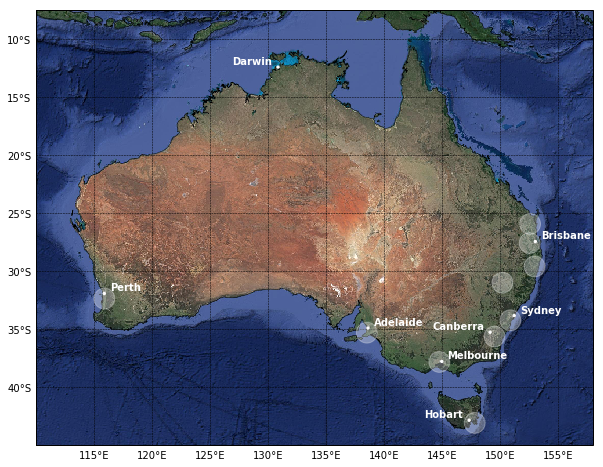

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker

import cartopy.crs as ccrs
from cartopy.io.img_tiles import GoogleTiles
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

radar_info = [('2', -37.855, 144.755),
             ('50', -27.606, 152.54),
             ('3', -34.263, 150.875),
             ('46', -35.33, 138.5030),
             ('8', -25.957, 152.577),
             ('69', -31.024, 150.192),
             ('28', -29.621, 152.963),
             ('70', -32.392, 115.867),
             ('40', -35.661, 149.512),
             ('76', -43.113, 147.805)]

city_info = [('Melbourne', -37.81, 144.96,'left'),
            ('Sydney', -33.86, 151.21,'left'),
            ('Brisbane',-27.47, 153.03,'left'),
            ('Adelaide',-34.93, 138.60,'left'),
            ('Perth',-31.95, 115.86,'left'),
            ('Hobart',-42.88, 147.32,'right'),
            ('Darwin',-12.43, 130.84,'right'),
            ('Canberra',-35.29, 149.13,'right')]

def main():
    tiler = GoogleTiles(desired_tile_form='RGB', style='satellite')
    #mercator = tiler.crs
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([110, 158, -45, -7.5], crs=ccrs.PlateCarree())
    #add features
    ax.add_image(tiler, 6)
    ax.coastlines('10m', linewidth=0.5)
    #build gridlines
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='w', linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.ylocator = mticker.FixedLocator([-45,-40,-35,-30,-25,-20,-15,-10,-5])
    gl.xlocator = mticker.FixedLocator([110,115,120,125,130,135,140,145,150,155,160])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    #add annotations
    for item in radar_info:
        ax.add_patch(mpatches.Circle(xy=[item[2],item[1]], radius=0.9, color='white', alpha=0.3, transform=ccrs.PlateCarree(), zorder=30))
        #plt.text(item[2], item[1], item[0], horizontalalignment='center', verticalalignment='center', transform=ccrs.PlateCarree(), weight="bold")
        
    #add annotations
    for item in city_info:
        ax.add_patch(mpatches.Circle(xy=[item[2],item[1]], radius=0.1, color='w', alpha=1.0, transform=ccrs.PlateCarree(), zorder=30))
        if item[3] == 'left':
            plt.text(item[2]+0.5, item[1]+0.5, item[0], horizontalalignment='left', verticalalignment='center', color='w', weight="bold", transform=ccrs.PlateCarree())
        else:
            plt.text(item[2]-0.5, item[1]+0.5, item[0], horizontalalignment='right', verticalalignment='center', color='w', weight="bold", transform=ccrs.PlateCarree())
            
    plt.savefig('dowdy_paper_fig1.png', dpi=150)
    plt.show()


if __name__ == '__main__':
    main()
